In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from drawarrow import ax_arrow
import mplcyberpunk

In [2]:
judges_appointments = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-10/judges_appointments.csv')
judges_people = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-10/judges_people.csv')

In [3]:
df = pd.merge(judges_appointments, judges_people, how="right", on="judge_id")

In [4]:
df['end_date'] = df['retirement_from_active_service'].fillna(df['termination_date'])

In [5]:
df['name'] = df['name_first'] + " " + df['name_last']

In [6]:
divdf = df[df["race"] != "White"]

In [7]:
divdf.shape

(408, 29)

In [8]:
divdf = divdf[["judge_id", "name", "court_type", "president_name", "president_party", "commission_date", "end_date", "birth_date", "gender", "race"]]

In [9]:
divdf

,judge_id,name,court_type,president_name,president_party,commission_date,end_date,birth_date,gender,race
9,6,Raymond Acosta,USDC,Ronald Reagan,Republican,09/30/1982,06/01/1994,1925.0,M,Hispanic
19,12,Henry Adams,USDC,William J. Clinton,Democratic,11/24/1993,04/08/2010,1945.0,M,African American
27,15,Robert Aguilar,USDC,Jimmy Carter,Democratic,06/18/1980,04/15/1996,1931.0,M,Hispanic
33,19,Arthur Alarcon,USCA,Jimmy Carter,Democratic,11/02/1979,11/21/1992,1925.0,M,Hispanic
43,3373,Arenda Allen,USDC,Barack Obama,Democratic,05/12/2011,NaN,1960.0,F,African American
...,...,...,...,...,...,...,...,...,...,...
4160,3142,Otis Wright,USDC,George W. Bush,Republican,04/16/2007,NaN,1944.0,M,African American
4164,3143,George Wu,USDC,George W. Bush,Republican,04/17/2007,NaN,1950.0,M,Asian American
4170,3293,James Wynn,USCA,Barack Obama,Democratic,08/10/2010,NaN,1954.0,M,African American
4172,3548,Staci Yandle,USDC,Barack Obama,Democratic,06/19/2014,NaN,1961.0,F,African American


In [10]:
divdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 9 to 4192
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   judge_id         408 non-null    int64  
 1   name             408 non-null    object 
 2   court_type       408 non-null    object 
 3   president_name   408 non-null    object 
 4   president_party  408 non-null    object 
 5   commission_date  407 non-null    object 
 6   end_date         198 non-null    object 
 7   birth_date       408 non-null    float64
 8   gender           408 non-null    object 
 9   race             399 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 35.1+ KB


In [11]:
divdf.dropna(subset = ['commission_date', 'race'], inplace=True)

In [12]:
today = "06/13/2025"
divdf["end_date"] = divdf["end_date"].fillna(today)

In [13]:
date_cols = ["commission_date", "end_date", "birth_date"]
divdf[date_cols] = divdf[date_cols].apply(pd.to_datetime)

In [14]:
divdf["tenure_length"] = (divdf["end_date"] - divdf["commission_date"]) / pd.Timedelta(days=1)

In [15]:
divdf["birth_year"] = divdf["birth_date"].astype(int)
divdf["commission_year"] = divdf["commission_date"].dt.year
divdf["age_at_comm"] = divdf["commission_year"] - divdf["birth_year"]
divdf = divdf.drop('birth_date', axis=1)

In [16]:
divdf

,judge_id,name,court_type,president_name,president_party,commission_date,end_date,gender,race,tenure_length,birth_year,commission_year,age_at_comm
9,6,Raymond Acosta,USDC,Ronald Reagan,Republican,1982-09-30,1994-06-01,M,Hispanic,4262.0,1925,1982,57
19,12,Henry Adams,USDC,William J. Clinton,Democratic,1993-11-24,2010-04-08,M,African American,5979.0,1945,1993,48
27,15,Robert Aguilar,USDC,Jimmy Carter,Democratic,1980-06-18,1996-04-15,M,Hispanic,5780.0,1931,1980,49
33,19,Arthur Alarcon,USCA,Jimmy Carter,Democratic,1979-11-02,1992-11-21,M,Hispanic,4768.0,1925,1979,54
43,3373,Arenda Allen,USDC,Barack Obama,Democratic,2011-05-12,2025-06-13,F,African American,5146.0,1960,2011,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,3142,Otis Wright,USDC,George W. Bush,Republican,2007-04-16,2025-06-13,M,African American,6633.0,1944,2007,63
4164,3143,George Wu,USDC,George W. Bush,Republican,2007-04-17,2025-06-13,M,Asian American,6632.0,1950,2007,57
4170,3293,James Wynn,USCA,Barack Obama,Democratic,2010-08-10,2025-06-13,M,African American,5421.0,1954,2010,56
4172,3548,Staci Yandle,USDC,Barack Obama,Democratic,2014-06-19,2025-06-13,F,African American,4012.0,1961,2014,53


In [17]:
divdf = divdf.sort_values(by="commission_date").reset_index().dropna(subset = ['index'])

In [18]:
idx_max_age = divdf.groupby("gender")["age_at_comm"].idxmax()
text_labels_max_age = divdf.loc[idx_max_age, ["judge_id","name","court_type","president_name","president_party","commission_date","end_date","gender","race",
                                              "tenure_length","birth_year","commission_year","age_at_comm"]].reset_index(drop=True)

idx_min_age = divdf.groupby("gender")["age_at_comm"].idxmin()
text_labels_min_age = divdf.loc[idx_min_age, ["judge_id","name","court_type","president_name","president_party","commission_date","end_date","gender","race",
                                              "tenure_length","birth_year","commission_year","age_at_comm"]].reset_index(drop=True)

idx_max_tenure = divdf.groupby("gender")["tenure_length"].idxmax()
text_labels_max_tenure = divdf.loc[idx_max_tenure, ["judge_id","name","court_type","president_name","president_party","commission_date","end_date","gender","race",
                                                    "tenure_length","birth_year","commission_year","age_at_comm"]].reset_index(drop=True)

In [19]:
text_labels_max_age

,judge_id,name,court_type,president_name,president_party,commission_date,end_date,gender,race,tenure_length,birth_year,commission_year,age_at_comm
0,3480,Nitza Quinones Alejandro,USDC,Barack Obama,Democratic,2013-06-19,2025-06-13,F,Hispanic,4377.0,1951,2013,62
1,2703,Shiro Kashiwa,USCA,Reassignment,Reassignment,1982-10-01,1986-01-07,M,Asian American,1194.0,1912,1982,70


In [20]:
text_labels_min_age

,judge_id,name,court_type,president_name,president_party,commission_date,end_date,gender,race,tenure_length,birth_year,commission_year,age_at_comm
0,2591,Ann Williams,USDC,Ronald Reagan,Republican,1985-04-04,1999-11-17,F,African American,5340.0,1949,1985,36
1,2377,Myron Thompson,USDC,Jimmy Carter,Democratic,1980-09-29,2013-08-22,M,African American,12015.0,1947,1980,33


In [21]:
text_labels_max_tenure

,judge_id,name,court_type,president_name,president_party,commission_date,end_date,gender,race,tenure_length,birth_year,commission_year,age_at_comm
0,408,Carmen Cerezo,USDC,Jimmy Carter,Democratic,1980-06-30,2025-06-13,F,Hispanic,16419.0,1940,1980,40
1,1973,Manuel Real,USDC,Lyndon B. Johnson,Democratic,1966-11-03,2025-06-13,M,Hispanic,21407.0,1924,1966,42


In [22]:
divdf[divdf["name"]=="Consuelo Marshall"]

,index,judge_id,name,court_type,president_name,president_party,commission_date,end_date,gender,race,tenure_length,birth_year,commission_year,age_at_comm
92,2367,1485,Consuelo Marshall,USDC,Jimmy Carter,Democratic,1980-09-30,2005-10-24,F,African American,9155.0,1936,1980,44


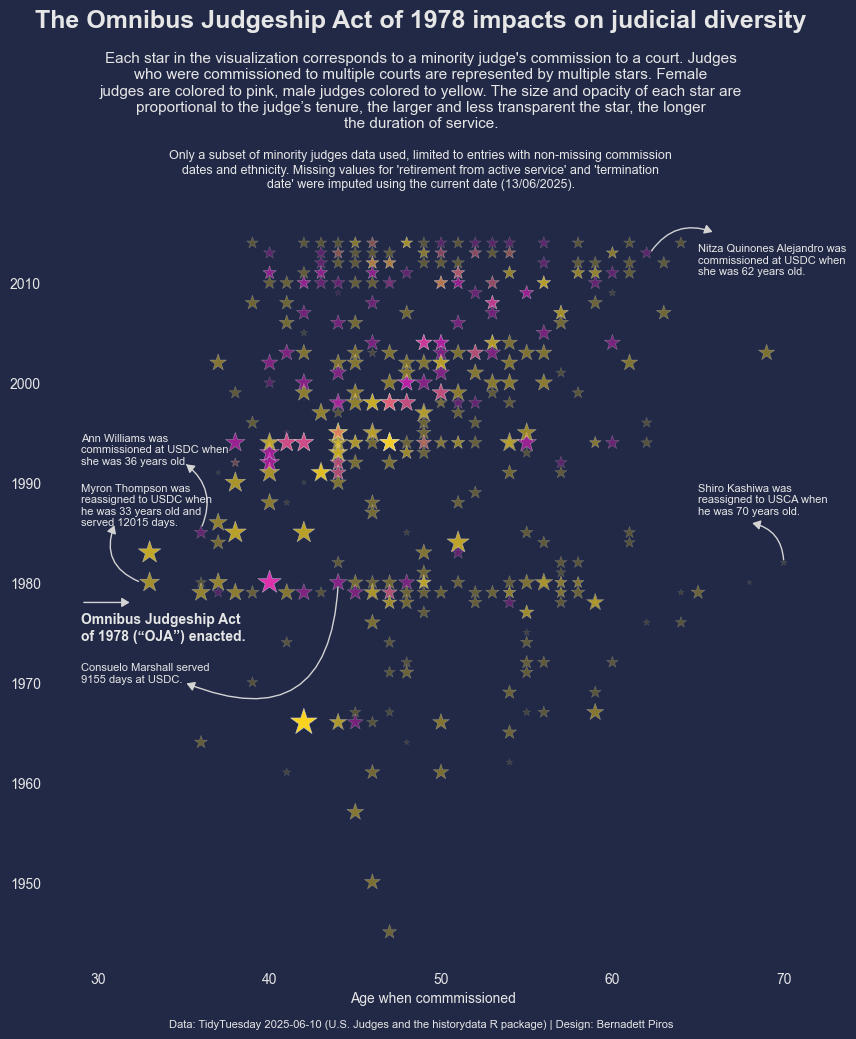

In [25]:
plt.style.use("cyberpunk")

color_mapping = {
    "F": "#f41ecb",    
    "M": "#fad31e"
}
colors = divdf["gender"].map(color_mapping)

# Custom scaling function
def scale(x, lower=0, upper=1):
    return ((x - np.min(x)) / (np.max(x) - np.min(x))) * (upper - lower)  + lower

# Scale 'col2' to get alpha and sizes
alpha = scale(divdf["tenure_length"], 0.1, 1)
sizes = scale(divdf["tenure_length"], 10, 400)

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(divdf["age_at_comm"], divdf["commission_year"], marker="*", color=colors, alpha=alpha, s=sizes, ec="lightgrey", lw=0.4)

ax.set_xlabel("Age when commmissioned", weight="light")

ax.grid(False)

ax_arrow(
  tail_position=[29, 1978],
  head_position=[32, 1978],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   #radius=-0.3,
   ax=ax,
)

ax.text(x=29, y=1977, s="Omnibus Judgeship Act\nof 1978 (“OJA”) enacted.", size=10, weight="bold", va="top")

ax_arrow(
  tail_position=[62.2, 2013],
  head_position=[66, 2015],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   radius=-0.4,
   ax=ax,
)

ax.text(x=65, y=2014, s="Nitza Quinones Alejandro was\ncommissioned at USDC when\nshe was 62 years old.", size=8, va="top")

ax_arrow(
  tail_position=[70, 1982],
  head_position=[68, 1986],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   radius=0.4,
   ax=ax,
)

ax.text(x=65, y=1990, s="Shiro Kashiwa was\nreassigned to USCA when\nhe was 70 years old.", size=8, va="top")

ax_arrow(
  tail_position=[36, 1985.4],
  head_position=[35, 1992],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   radius=0.4,
   ax=ax,
)

ax.text(x=29, y=1995, s="Ann Williams was\ncommissioned at USDC when\nshe was 36 years old.", size=8, va="top")

ax_arrow(
  tail_position=[32.5, 1980],
  head_position=[31, 1986],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   radius=-0.5,
   ax=ax,
)

ax.text(x=29, y=1990, s="Myron Thompson was\nreassigned to USDC when\nhe was 33 years old and\nserved 12015 days.", size=8, va="top")

ax_arrow(
  tail_position=[44, 1979.8],
  head_position=[35, 1970],
  color="lightgrey",
  width=1,
  double_headed=False,
   fill_head=True,
   head_width=2.8,
   head_length=4.7,
   radius=-0.7,
   ax=ax,
)

ax.text(x=29, y=1972, s="Consuelo Marshall served\n9155 days at USDC.", size=8, va="top")

fig.text(0.5, 1.05, "The Omnibus Judgeship Act of 1978 impacts on judicial diversity", size=18, weight="bold", ha="center")

fig.text(0.5, 0.95, "Each star in the visualization corresponds to a minority judge's commission to a court. Judges\nwho were commissioned to multiple courts are represented by multiple stars. Female\njudges are colored to pink, male judges colored to yellow. The size and opacity of each star are\nproportional to the judge’s tenure, the larger and less transparent the star, the longer\nthe duration of service.",
         size=11, ha="center")

fig.text(0.5, 0.89, "Only a subset of minority judges data used, limited to entries with non-missing commission\ndates and ethnicity. Missing values for 'retirement from active service' and 'termination\ndate' were imputed using the current date (13/06/2025).",
         size=9, ha="center")

fig.text(0.5, 0.05, "Data: TidyTuesday 2025-06-10 (U.S. Judges and the historydata R package) | Design: Bernadett Piros",
         size=8, ha="center")

plt.show()

fig.savefig("2025-06-10.png", bbox_inches='tight', pad_inches=0.2)